In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/clean/df_clean.csv')

In [3]:
df.columns

Index(['LAMBX', 'LAMBY', 'DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q', 'MONTH'],
      dtype='object')

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [5]:
df = df.reset_index(drop=True).sort_values(by='DATE')

In [21]:
df_snowlvl = df[['DATE', 'PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q']]

In [7]:
def transform_to_supervised(df, datetime_col, feature_cols, target_col, n_past=24, n_future=7):

    df = df.copy()
    df.sort_values(by=datetime_col, inplace=True)
    df.reset_index(drop=True, inplace=True)

    supervised = pd.DataFrame()

    for col in feature_cols:
        for i in range(n_past, 0, -1):
            supervised[f'{col}(t-{i})'] = df[col].shift(i)

    for i in range(0, n_future):
        supervised[f'{target_col}(t+{i})'] = df[target_col].shift(-i)

    supervised.dropna(inplace=True)

    return supervised


In [8]:
df_supervised = transform_to_supervised(df_snowlvl, 'DATE', ['PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q'], 'HTEURNEIGE_Q', n_past=24, n_future=7)

C:\Users\dmitrii.druzhbin\AppData\Local\Temp\ipykernel_15744\1490679623.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  supervised[f'{col}(t-{i})'] = df[col].shift(i)
C:\Users\dmitrii.druzhbin\AppData\Local\Temp\ipykernel_15744\1490679623.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  supervised[f'{col}(t-{i})'] = df[col].shift(i)
C:\Users\dmitrii.druzhbin\AppData\Local\Temp\ipykernel_15744\1490679623.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

In [9]:
X = df_supervised.iloc[:,:-7].copy()
y = df_supervised.iloc[:,-7:].copy()

In [10]:
X

,PRENEI_Q(t-24),PRENEI_Q(t-23),PRENEI_Q(t-22),PRENEI_Q(t-21),PRENEI_Q(t-20),PRENEI_Q(t-19),PRENEI_Q(t-18),PRENEI_Q(t-17),PRENEI_Q(t-16),PRENEI_Q(t-15),...,TSUP_H_Q(t-10),TSUP_H_Q(t-9),TSUP_H_Q(t-8),TSUP_H_Q(t-7),TSUP_H_Q(t-6),TSUP_H_Q(t-5),TSUP_H_Q(t-4),TSUP_H_Q(t-3),TSUP_H_Q(t-2),TSUP_H_Q(t-1)
24,4.8,0.1,13.4,1.8,0.0,0.0,7.9,4.7,2.7,0.1,...,1.1,3.4,2.2,1.4,1.4,-0.1,0.8,1.1,2.3,2.2
25,0.1,13.4,1.8,0.0,0.0,7.9,4.7,2.7,0.1,0.0,...,3.4,2.2,1.4,1.4,-0.1,0.8,1.1,2.3,2.2,-0.5
26,13.4,1.8,0.0,0.0,7.9,4.7,2.7,0.1,0.0,6.0,...,2.2,1.4,1.4,-0.1,0.8,1.1,2.3,2.2,-0.5,-0.6
27,1.8,0.0,0.0,7.9,4.7,2.7,0.1,0.0,6.0,3.2,...,1.4,1.4,-0.1,0.8,1.1,2.3,2.2,-0.5,-0.6,-3.4
28,0.0,0.0,7.9,4.7,2.7,0.1,0.0,6.0,3.2,3.6,...,1.4,-0.1,0.8,1.1,2.3,2.2,-0.5,-0.6,-3.4,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,19.2,13.8,17.7,18.3,19.5,16.8,16.4,19.1,16.0,13.9
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,13.8,17.7,18.3,19.5,16.8,16.4,19.1,16.0,13.9,18.8
3326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,17.7,18.3,19.5,16.8,16.4,19.1,16.0,13.9,18.8,11.3
3327,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,...,18.3,19.5,16.8,16.4,19.1,16.0,13.9,18.8,11.3,14.6


In [11]:
y

,HTEURNEIGE_Q(t+0),HTEURNEIGE_Q(t+1),HTEURNEIGE_Q(t+2),HTEURNEIGE_Q(t+3),HTEURNEIGE_Q(t+4),HTEURNEIGE_Q(t+5),HTEURNEIGE_Q(t+6)
24,0.190,0.189,0.192,0.194,0.215,0.277,0.270
25,0.189,0.192,0.194,0.215,0.277,0.270,0.266
26,0.192,0.194,0.215,0.277,0.270,0.266,0.272
27,0.194,0.215,0.277,0.270,0.266,0.272,0.260
28,0.215,0.277,0.270,0.266,0.272,0.260,0.248
...,...,...,...,...,...,...,...
3324,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3325,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3326,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3327,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [12]:
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

# y_train_scaled = scaler_y.fit_transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)

y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

In [15]:
len(['PRENEI_Q', 'PRELIQ_Q', 'T_Q', 'FF_Q', 'Q_Q',
       'DLI_Q', 'SSI_Q', 'HU_Q', 'EVAP_Q', 'ETP_Q', 'PE_Q', 'SWI_Q',
       'DRAINC_Q', 'RUNC_Q', 'RESR_NEIGE_Q', 'RESR_NEIGE6_Q', 'HTEURNEIGE_Q',
       'HTEURNEIGE6_Q', 'HTEURNEIGEX_Q', 'SNOW_FRAC_Q', 'ECOULEMENT_Q',
       'WG_RACINE_Q', 'WGI_RACINE_Q', 'TINF_H_Q', 'TSUP_H_Q'])

25

In [114]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [128]:
model_rf.fit(X_train_scaled, y_train_scaled)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [129]:
yhat = model_rf.predict(X_test_scaled)

In [130]:
yhat.shape

(661, 7)

In [19]:
import matplotlib.pyplot as plt

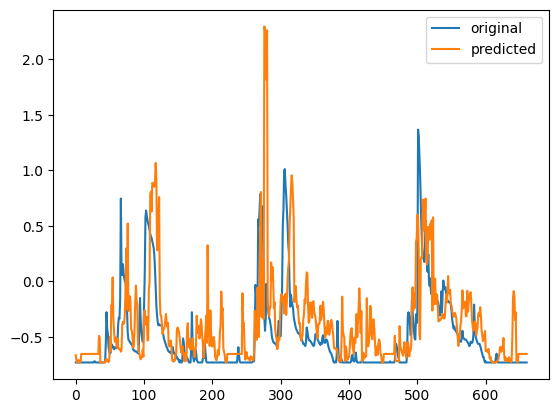

In [132]:
yhat = model_rf.predict(X_test_scaled)
plt.plot(y_test_scaled[:,6], label='original')
plt.plot(yhat[:,6], label='predicted')
plt.legend();

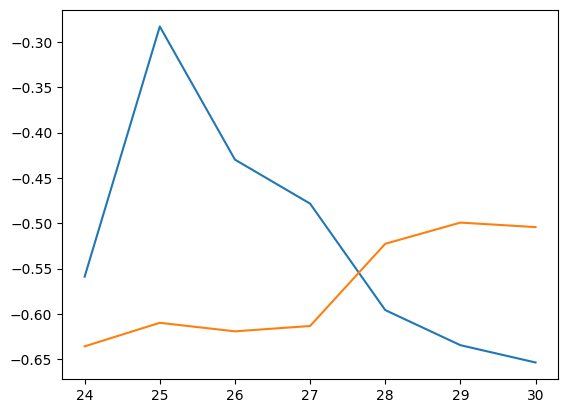

In [136]:
# plt.plot(range(24), X_test_scaled[25])
plt.plot(range(24,31), y_test_scaled[50])
plt.plot(range(24,31), yhat[50]);

In [122]:
from xgboost import XGBRegressor

In [245]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train_scaled)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


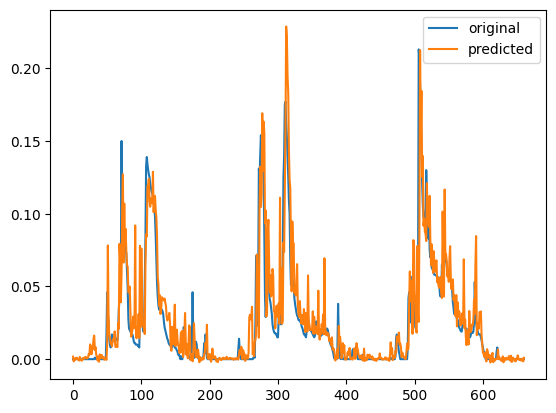

In [251]:
yhat = model_xgb.predict(X_test_scaled)
plt.plot(y_test_scaled.reset_index(drop=True).iloc[:,1], label='original')
plt.plot(yhat[:,1], label='predicted')
plt.legend();

In [16]:
df_snowlvl = df_snowlvl[['DATE', 'HTEURNEIGE_Q']]

In [17]:
df_snowlvl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3335 entries, 0 to 3334
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          3335 non-null   datetime64[ns]
 1   HTEURNEIGE_Q  3335 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.2 KB


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

C:\Users\dmitrii.druzhbin\AppData\Local\Temp\ipykernel_15744\3083688591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_snowlvl['DATE'] = pd.to_datetime(df_snowlvl['DATE'])


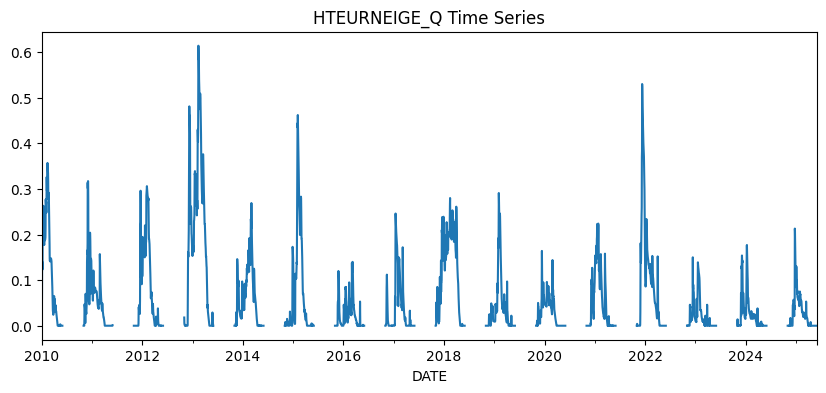

In [22]:

import matplotlib.pyplot as plt
# Set DATE as index
df_snowlvl['DATE'] = pd.to_datetime(df_snowlvl['DATE'])
df_snowlvl.set_index('DATE', inplace=True)

# Optional: resample to daily (if not already)
df_snowlvl = df_snowlvl.asfreq('D')

# Plot
df_snowlvl['HTEURNEIGE_Q'].plot(title='HTEURNEIGE_Q Time Series', figsize=(10, 4))
plt.show()


In [23]:
result = adfuller(df_snowlvl['HTEURNEIGE_Q'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.6826013599277365
p-value: 4.304475179141353e-09


In [ ]:
model = SARIMAX(df_snowlvl['HTEURNEIGE_Q'],
                order=(1,1,1),
                seasonal_order=(1,1,1,365),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit()
results.summary()